# 물체 탐지(Object detection)

물체 탐지는 영상에서 미리 정해진 카테고리의 물체 영역을 찾아내는 작업.

1.  대상 물체의 존재를 탐지하고(detection)
2.  대상의 영역을 정하고(localization)
3. 대상 영역이 어떤 카테고리인지를 분류한다.(classification)



## 물체 분류와의 차이

물체 분류(object classification)는 주어진 영상 전체에 대하여 어떤 것인지 분류하는 작업

물체 탐지(object detection)는 주어진 영상에서 물체 부분을 구하고, 그 부분을 분류한다.

**물체 분류(Object Classification)**

전체 영상을 주어진 카테고리 양, 개, 사람으로 분류하였다.

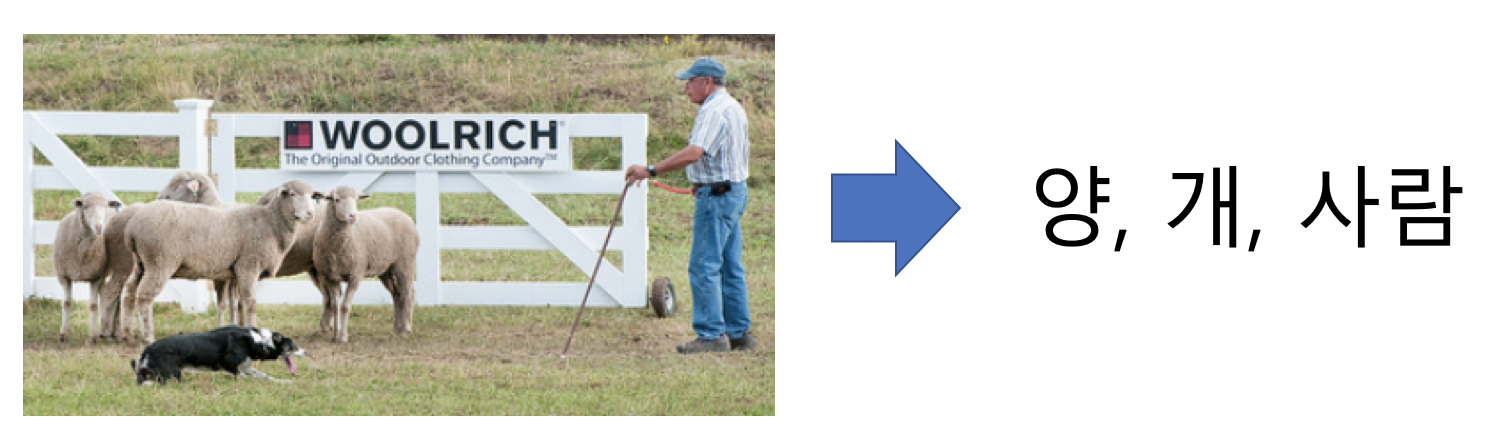

**물체 탐지(Object Detection)**

전체 영상에서 양, 개, 사람의 영역을 구하고, 각 그 영역을 양, 개, 사람으로 분류하였다.

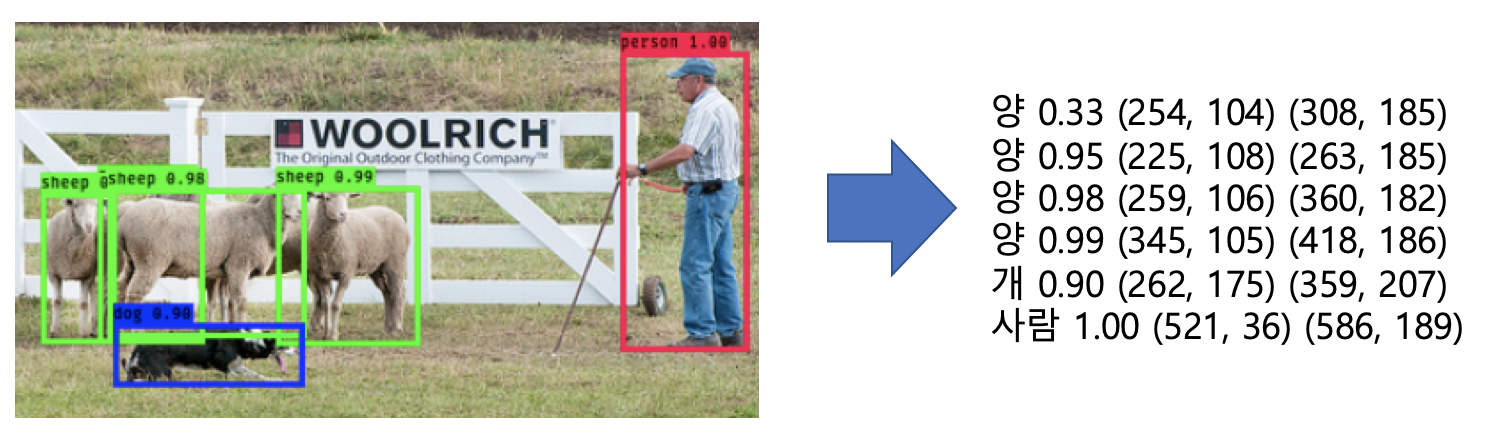

# 물체 분류 대회

다음과 같은 대회가 있다.

- PASCAL VOC challenge, 2006 ~ 2012, VOC 데이타
- ILSVRC challenge, 2013 ~, ImageNet 데이타
- MS COCO challenge 2015 ~, Coco 데이타

데이타베이스에 따른 대회들이다. 

- VOC : 20개 카테고리 1.1만개 영상
- ImageNet 21,841개 카테고리, 1400만개 영상
- COCO : 91개 카테고리, 32만개 영상


모두 일반 일상의 영상들이다.


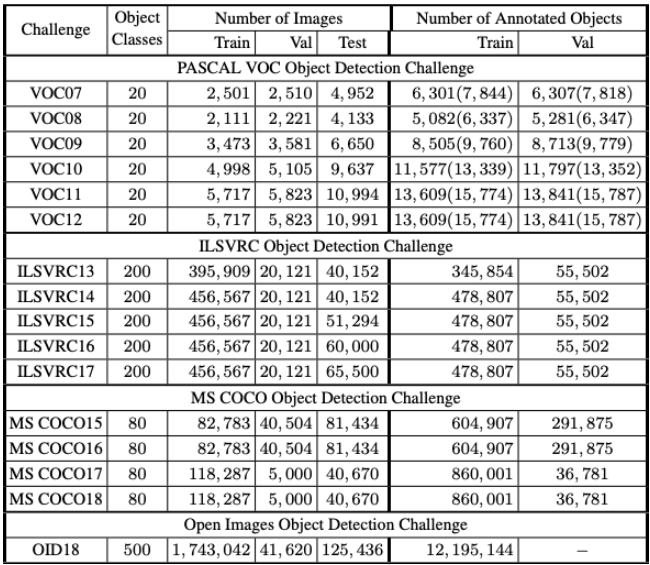

## 정확도

VOC 데이타(20 카테고리)에 대해서는 90%정도의 ILSVRC(200 카테고리)에서는 75%정도의 정확도를 보이고 있다.

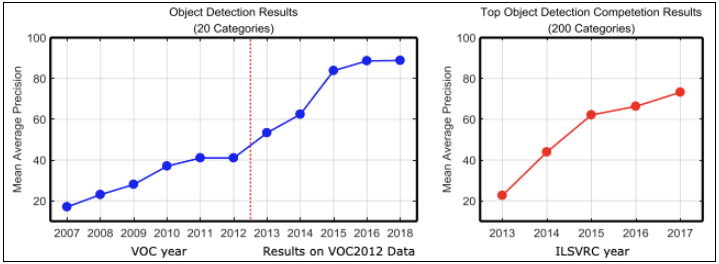

## 작업들

- 영상 분류 
- 일반 물체 탐지
- 픽셀 단위 영역 분할
- 객체 단위 영역 분할

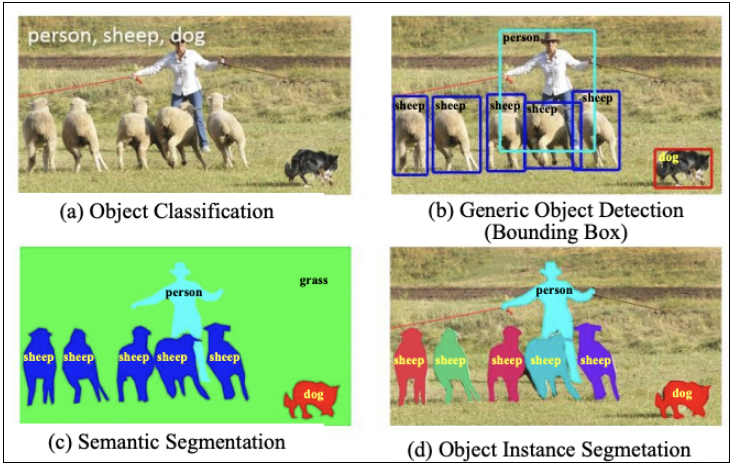

## 성능 측정 지표

IoU, mAP, AR이 많이 사용된다.

**IoU(Intersection over Union)**

정답과 답변의 전체 면적 중 교차되는 비중. 0에서 1의 범위이며, 클 수록 성능이 좋다.

하지만 여러개가 있을 경우 IoU만으로는 성능 비교가 곤란하다.

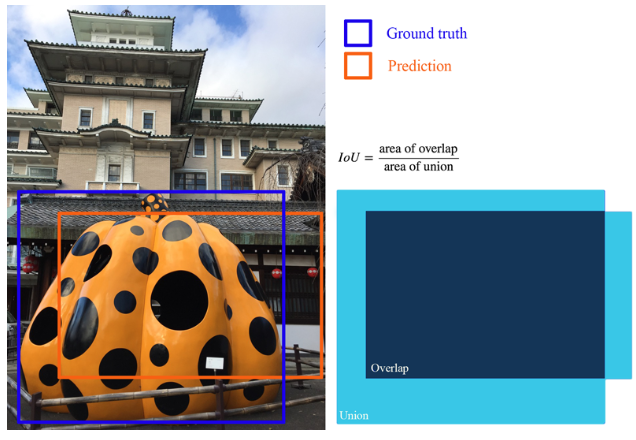

**mAP(mean Average Precision)**

여러개의 물체가 탐지된 경우, 각각의 정확도를 평균낸 값

**AR(Average Recall)**

탐지할 물체 갯수 중 정확히 탐지한 갯수의 비율의 평균.



# 물체 탐지 방법들

2012년 이후 영상처리에 딥러닝으로 우수한 성능을 보였다.

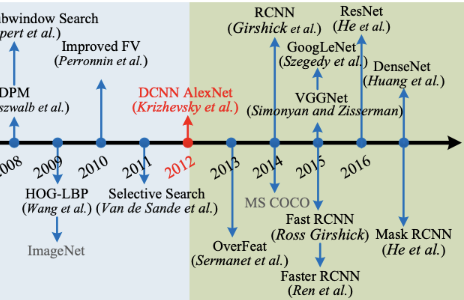

물체 탐지도 2012년을 깃점으로 딥러닝 방식이 많이 시도되고 있다.

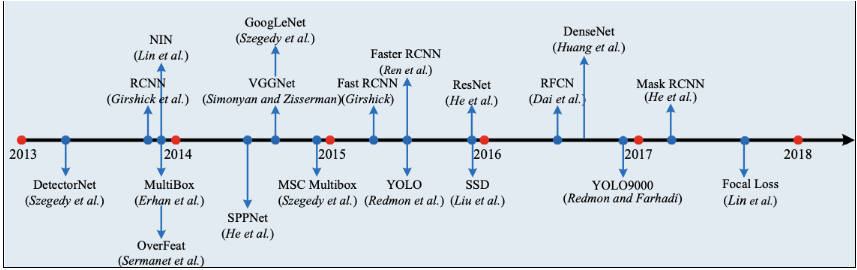

## 물체 분류 모델들

물체 분류는 물체가 있는 영역 추출과 그 영역의 분류가 동시에 실행된다.

이를 순차적으로 하는 방법과 동시에 하는 방법으로 크게 나뉜다.


방법은 다양하지만 전부 CNN을 사용하여 특질을 추출하고, 그 결과를 가지고 처리하는 구조를 가지고 있다.

## 순차적 처리 방법

많은 후보 영역을 추출하고, 각 영역에 대하여 분류를 진행.

이런 이유로 처리 시간이 길다

- RCNN(Region CNN)
- Fast RCNN
- Faster RCNN
- RFCN(Region based Fully Convoluional Networks)
- Mask RCNN

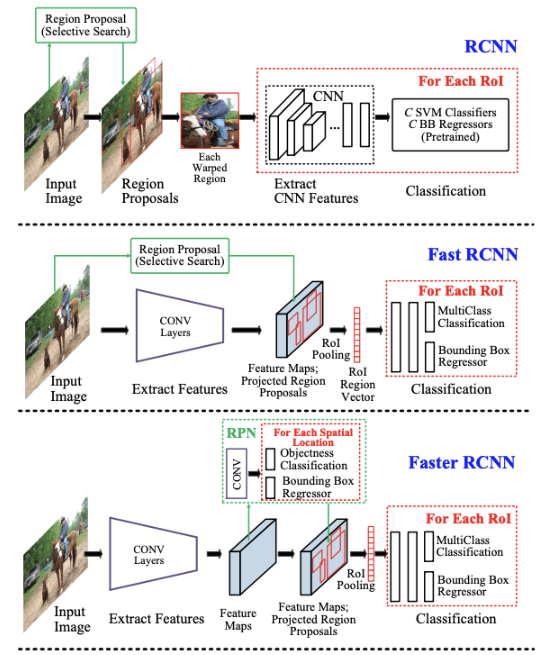

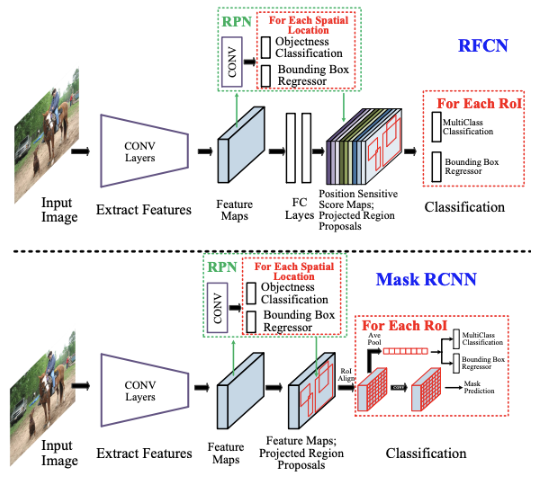

## 동시 처리 방법

영역 추출과 분류를 동시에 처리한다. 빠르다.

- YOLO(You Only Looks Once)
- SSD(Single Shot Detector)

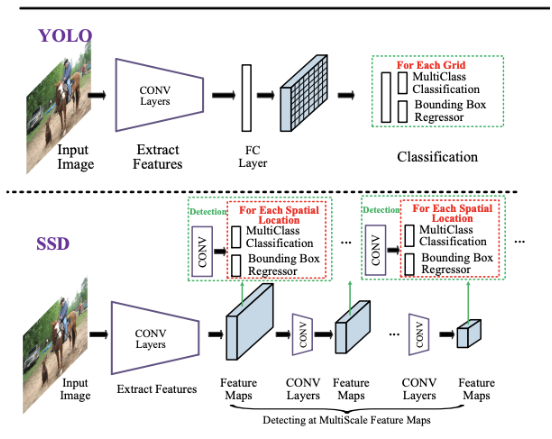

# YOLO

2015년에 발표된 방법.

빠르다는 것이 가장 큰 장점




이후 YOLO2, YOLO3가 나왔다.

## 성능

초당 50번 정도의 성능을 낸다.

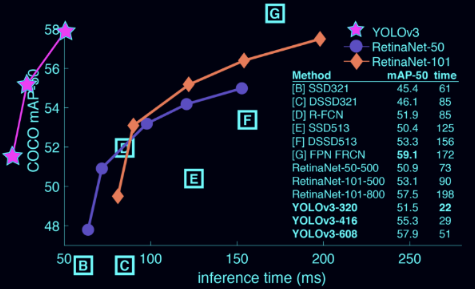

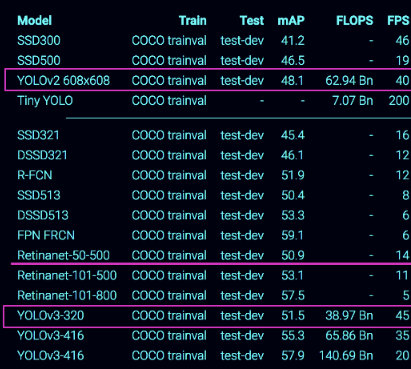

## 구조

GoogLeNet을 기반으로 한다.

GoogLeNet 뒤에 2개의 conv 레이어와 2개의 fully connected 레이어를 추가하였다.

출력은 1470x1의 벡터이다.


이는 49x30으로, 30개의 값으로 표현한 2개의 검출 결과 49개를 의미한다.




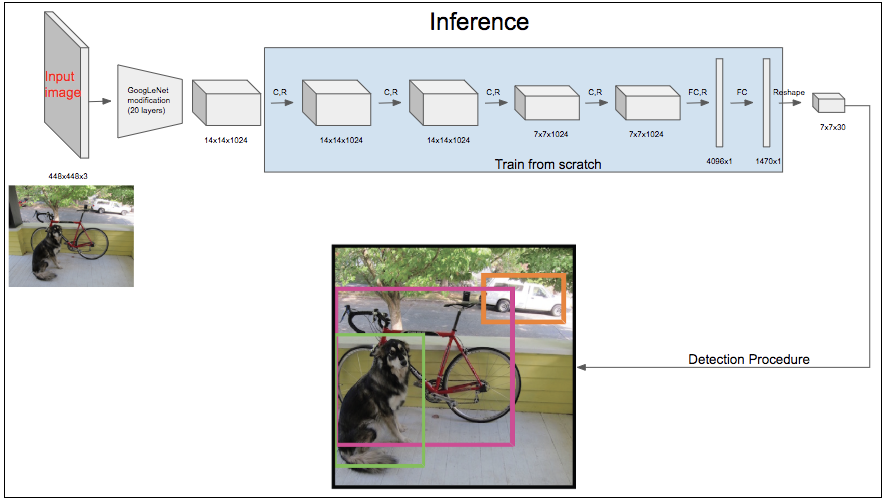

결국 네트웤은 탐지된 영역 98개와 각 영역 별 분류결과를 출력한다.

출력된 98개 중 값이 높은 것들만 골라서 최종 결과로 한다.


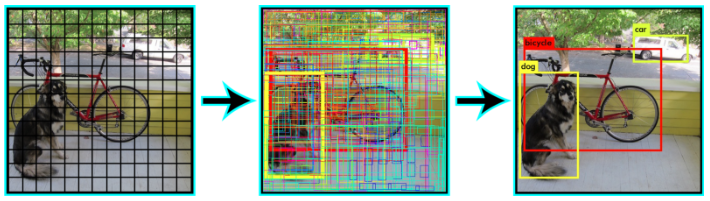

##  DarkNet

c/c++로 구현된 딥러닝 프레임웤.

모델의 구조와 학습된 결과는 공개되어 있다.

Keras에서 YOLO를 사용하려면 모델 구조 설정과 모델 파일을 파싱하여 처리하여야 한다.

# 실습 준비

## Google Driver와 Colab 연동

In [1]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount = True)

ModuleNotFoundError: No module named 'google.colab'

## 실행위치 이동

In [2]:
# 실행 위치 이동
%cd
%cd ../content/gdrive/MyDrive/

/root
/content/gdrive/MyDrive


In [3]:
# 이동된 위치 확인
!pwd
!ls -al

/content/gdrive/MyDrive
total 196087
drwx------ 2 root root     4096 Nov 24 12:17  워다타
drwx------ 2 root root     4096 Jan  3 07:29  딥러닝_파일_자료
drwx------ 2 root root     4096 Aug  2  2020  딥러닝책
drwx------ 2 root root     4096 Sep 12 07:34  공유전용
drwx------ 2 root root     4096 Mar 26  2020  이미지영상처리
drwx------ 2 root root     4096 Nov 21 04:57  인공지능공부
drwx------ 2 root root     4096 Sep  3 08:58  원불교프로젝트
drwx------ 2 root root     4096 Oct  9 18:25  서울데이터과학연구회
-rw------- 1 root root 57445026 Oct  7  2019 '제10회_IT&미디어컨텐츠_경진대회_제출영상_워다타(WORDATA).zip'
drwx------ 2 root root     4096 Mar 26  2019 'Colab Notebooks'
drwx------ 2 root root     4096 Feb  1 00:15  DATA
drwx------ 2 root root     4096 May 27  2020  Deep_Learning_with_Keras
-rw------- 1 root root      151 Jun 10  2019  ER모델링.gslides
-rw------- 1 root root 93933797 Dec 17 06:40  first-order-motion.pptx
drwx------ 2 root root     4096 O

# YOLO3로 물체 탐지

## Keras 코드 다운로드

다음 주소의 코드를 다운 받는다.

*  원본 주소 : https://github.com/xiaochus/YOLOv3



In [ ]:
# 다운로드 
!git clone https://github.com/xiaochus/YOLOv3
  


Cloning into 'YOLOv3'...
remote: Enumerating objects: 95, done.
remote: Total 95 (delta 0), reused 0 (delta 0), pack-reused 95
Unpacking objects: 100% (95/95), done.


In [ ]:
# 다운로드된 디렉토리로 이동
%cd YOLOv3

# 내용 확인
!pwd
!ls -al  

/content/gdrive/My Drive/이미지영상처리/yolo_test/keras_yolo/YOLOv3
/content/gdrive/My Drive/이미지영상처리/yolo_test/keras_yolo/YOLOv3
total 723326
drwx------ 2 root root      4096 Apr 10 14:35 cfg
drwx------ 2 root root      4096 Apr 10 14:35 data
-rw------- 1 root root      4122 Aug 12 15:22 demo.py
drwx------ 2 root root      4096 Apr 10 14:35 .git
-rw------- 1 root root      1157 Apr 10 14:35 .gitignore
-rw------- 1 root root 246326928 Apr 10 15:17 golf_custom.weights
drwx------ 2 root root      4096 Apr 10 14:35 images
-rw------- 1 root root      1062 Apr 10 14:35 LICENSE
drwx------ 2 root root      4096 Apr 10 14:35 model
-rw------- 1 root root      1186 Apr 10 14:35 README.md
drwx------ 2 root root      4096 Apr 10 14:35 videos
-rw------- 1 root root     11307 Apr 10 14:35 yad2k.py
-rw------- 1 root root 248007048 Mar 25  2018 yolov3.weights
-rw------- 1 root root 246305388 Oct  5  2018 yolov3-wider_16000.weights


## YOLO3 모델 파일 다운로드

COCO 데이터로 이미 학습되어 공개된 모델 파일을 다운로드 받는다.


In [ ]:
# 모델 파일 다운로드
!wget https://pjreddie.com/media/files/yolov3.weights

--2020-03-29 13:21:31--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights.1’

yolov3.weights.1      0%[                    ]       0  --.-KB/s               ^C


In [ ]:
!pwd

/content/gdrive/My Drive/yolo_test/YOLOv3


In [ ]:
!ls

cfg			 demo.py  model      yad2k.py
coordinate_and_time.txt  images   README.md  yolo3_structure.png
data			 LICENSE  videos     yolov3.weights


## Keras로 변환

YOLO3 자체는 C/C++로 구현된 DarkNet 프레임웤으로 구현되어 있다. 

본 실습에서는 DarkNet으로 학습된 모델파일을 읽어서 Keras로 변환해서 사용한다.

변환에 사용되는 파일은 다음과 같다.


- yad2k.py : 변환 실행 파일

- yolov3.cfg : Darknet에서 사용하는 모델 구조 정의 파일

- yolov3.weight : Darknet으로 학습된 모델 파일


실행 결과로 다음의 h5 파일로 변환된다.
 
- model/yolo.h5 : Keras로 변환된 모델 파일


In [ ]:
!pip uninstall tensorflow -y
!pip install tensorflow==2.3.0

Uninstalling tensorflow-2.3.0:
  Successfully uninstalled tensorflow-2.3.0
  Using cached https://files.pythonhosted.org/packages/97/ae/0b08f53498417914f2274cc3b5576d2b83179b0cbb209457d0fde0152174/tensorflow-2.3.0-cp36-cp36m-manylinux2010_x86_64.whl


In [ ]:
import tensorflow as tf
print(tf.__version__)

2.3.0


## 모델구조 보이기

In [1]:
!ls data

'ls'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.


In [ ]:
from keras.models import load_model
from keras.utils.vis_utils import plot_model
from IPython.display import Image, display

# 모델 파일 로딩
model = load_model('data/golf_custom1.h5')

# 구조를 이미지로 저장
plot_model(model, show_shapes=True, to_file='yolo3_structure.png')

# 이미지 보이기
display(Image(filename='yolo3_structure.png')) 

In [2]:
# 파일 다운로드
!wget http://farm9.staticflickr.com/8037/7910745890_0bf8ac8afd_z.jpg -O '/content/gdrive/My Drive/yolo_test/YOLOv3/images/test/ex_img.jpg'

# 이미지 보이기
from IPython.display import Image, display
display(Image(filename='/content/gdrive/My Drive/yolo_test/YOLOv3/images/test/ex_img.jpg')) 

'wget'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.


FileNotFoundError: [Errno 2] No such file or directory: '/content/gdrive/My Drive/yolo_test/YOLOv3/images/test/ex_img.jpg'

## 3. 대상 이미지 다운로드
 - Object Detection할 이미지 파일 다운로드
 - 원본주소 : http://farm9.staticflickr.com/8037/7910745890_0bf8ac8afd_z.jpg
  - ex_img.jpg 파일로 저장함
 

## 필요 라이브러리 설치

easydict 라이브러리 설치


In [ ]:
!pip install easydict

## 물체 탐지 실행
물체 탐지를 실행한다.

이때 다음의 파일을 가지고 실행을 한다
- data/yolo3.h5 : 이미 학습된 모델 파일
- data/coco_classes.txt : 클래스 이름
- image폴더 밑 test 폴더 이미지 불러와 실행 후 res폴더에 결과 저장


In [ ]:
%cd YOLOv3/

/content/gdrive/My Drive/이미지영상처리/yolo_test/keras_yolo/YOLOv3


In [ ]:
%run demo.py

580360650,3978602446_align.jpg
time: 2.30s
class: face, score: 1.00
box coordinate x,y,w,h: [ 91.96825027  93.72099042 208.66339803 224.85373914]

005.jpg
time: 1.13s
class: face, score: 1.00
box coordinate x,y,w,h: [117.68287718 141.98016652 177.48114243 229.29040617]

dog.jpg
time: 1.13s
eagle.jpg
time: 1.16s
giraffe.jpg
time: 1.13s
horses.jpg
time: 1.13s
person.jpg
time: 1.14s
takagaki.jpg
time: 1.13s
class: face, score: 1.00
box coordinate x,y,w,h: [510.11930466 426.07624054 372.38086224 479.70035956]



## 결과 이미지 확인

In [ ]:
# 이미지 보이기
from IPython.display import Image, display
display(Image(filename='/content/gdrive/My Drive/yolo_test/YOLOv3/images/res/005.jpg')) 

FileNotFoundError: ignored

In [ ]:
# 이미지 보이기
from IPython.display import Image, display
display(Image(filename='/content/gdrive/My Drive/yolo_test/YOLOv3/images/res/ex_img.jpg')) 

# Reference

- YOLO 실습 코드 :  https://github.com/xiaochus/YOLOv3
- YOLO : https://pjreddie.com/darknet/
- Object Detection Survey : https://arxiv.org/pdf/1809.02165v1.pdf?fbclid=IwAR2_FnOpBS_scTRJv0EMR-dCPywWYLP3pTgXHoahtOjfp2XfiEH6eujmqKw